# Câu hỏi nghiên cứu 1: Phân tích Xu hướng và Tính Mùa vụ của Chất lượng Không khí

## 1. Định nghĩa Câu hỏi (The Question)
*   **Câu hỏi:** Chất lượng không khí (đại diện bởi chỉ số AQI) tại Đài Loan đã thay đổi như thế nào trong giai đoạn **2016–2024**, và liệu có tồn tại các **mô hình biến động theo mùa (seasonality)** hoặc chu kỳ lặp lại ổn định qua các năm không?
*   **Phạm vi:** Phân tích trên toàn bộ tập dữ liệu đã làm sạch, tập trung vào biến số `AQI` và `PM2.5` theo trục thời gian (Năm, Tháng).

## 2. Động lực & Lợi ích (Motivation & Benefits)
*   **Tại sao câu hỏi này đáng nghiên cứu?**
    *   Ô nhiễm không khí là vấn đề sức khỏe cộng đồng nghiêm trọng tại các nước công nghiệp phát triển như Đài Loan.
    *   Việc hiểu rõ xu hướng dài hạn giúp đánh giá hiệu quả của các chính sách bảo vệ môi trường đã được áp dụng.
    *   Việc xác định tính mùa vụ giúp dự đoán trước các đợt ô nhiễm cao điểm.
*   **Đối tượng hưởng lợi:**
    *   **Cơ quan quản lý:** Có cơ sở dữ liệu để điều chỉnh chính sách kiểm soát khí thải.
    *   **Người dân:** Biết được những tháng nào trong năm là "mùa ô nhiễm" để chủ động các biện pháp bảo vệ sức khỏe (đeo khẩu trang, hạn chế hoạt động ngoài trời).
*   **Vấn đề thực tế:** Cung cấp bằng chứng định lượng để trả lời cho câu hỏi: "Môi trường sống của chúng ta đang tốt lên hay xấu đi?".

## 3. Quy trình Phân tích (Data Analysis Pipeline)

### A. Tiền xử lý (Preprocessing)
Trước khi vẽ biểu đồ, chúng ta cần chuẩn bị dữ liệu thời gian:
1.  **Load dữ liệu:** Đọc file `air_quality_processed.csv` (kết quả từ Notebook 02).
2.  **Date Parsing:** Chuyển đổi cột `date` sang định dạng `datetime` chuẩn của Pandas.
3.  **Feature Extraction:** Tách các thành phần thời gian (`Year`, `Month`, `Hour`) thành các cột riêng biệt để phục vụ việc gom nhóm (groupby).

### B. Phương pháp Phân tích (Analytical Approach)
Chúng ta sẽ sử dụng phương pháp **Thống kê mô tả (Descriptive Statistics)** kết hợp với **Trực quan hóa chuỗi thời gian (Time-series Visualization)**:

1.  **Xu hướng dài hạn (Long-term Trend):**
    *   *Phương pháp:* Tính trung bình AQI theo từng năm (`groupby('year')`).
    *   *Trực quan hóa:* **Line Chart** để thấy sự tăng/giảm qua các năm.

2.  **Mô hình Mùa vụ (Seasonality):**
    *   *Phương pháp:* Tính trung bình AQI theo tháng (tổng hợp tất cả các năm).
    *   *Trực quan hóa:* **Bar Chart** để xác định tháng nào ô nhiễm nhất/sạch nhất.

3.  **Mức độ ổn định của Quy luật (Pattern Stability):**
    *   *Phương pháp:* Tạo bảng Pivot (Năm x Tháng) và so sánh chu kỳ của từng năm riêng biệt.
    *   *Trực quan hóa:* **Heatmap** (để nhìn toàn cảnh độ đậm nhạt ô nhiễm) và **Multi-line Chart** (để so sánh sự đồng pha giữa các năm).

---

## Chuẩn bị dữ liệu (Load & Feature Engineering)

## Phân tích xu hướng dài hạn (Yearly Trend)

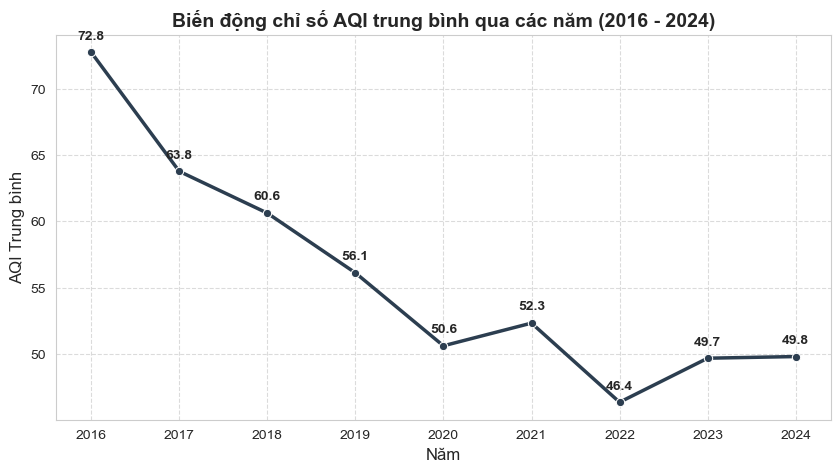

In [14]:
# Tính trung bình AQI theo từng năm
yearly_trend = df.groupby('year')['aqi'].mean().reset_index()

# Trực quan hóa
plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_trend, x='year', y='aqi', marker='o', linewidth=2.5, color='#2c3e50')

# Trang trí biểu đồ
plt.title('Biến động chỉ số AQI trung bình qua các năm (2016 - 2024)', fontsize=14, fontweight='bold')
plt.xlabel('Năm', fontsize=12)
plt.ylabel('AQI Trung bình', fontsize=12)
plt.xticks(yearly_trend['year']) # Hiển thị đủ các năm
plt.grid(True, linestyle='--', alpha=0.7)

# Thêm nhãn giá trị lên điểm
for x, y in zip(yearly_trend['year'], yearly_trend['aqi']):
    plt.text(x, y + 1, f'{y:.1f}', ha='center', fontweight='bold')

plt.show()

### Nhận xét về Xu hướng Dài hạn (Yearly Trend)

Dựa trên biểu đồ đường biểu diễn chỉ số AQI trung bình tại Đài Loan từ năm 2016 đến 2024, chúng ta có thể rút ra các quan sát quan trọng sau:

**1. Xu hướng tổng quan: Cải thiện rõ rệt**
*   Nhìn chung, chất lượng không khí đã có sự **cải thiện đáng kể** trong 9 năm qua. Chỉ số AQI trung bình đã giảm từ mức cao nhất là **72.8** (năm 2016) xuống còn khoảng **49.8** (năm 2024).
*   Mức giảm này tương đương với việc giảm khoảng **31.6%** chỉ số ô nhiễm so với thời điểm bắt đầu quan trắc trong dữ liệu, cho thấy hiệu quả tích cực của các chính sách quản lý môi trường dài hạn.

**2. Giai đoạn giảm mạnh (2016 - 2020)**
*   Từ năm 2016 đến 2020 là giai đoạn chất lượng không khí được cải thiện liên tục và mạnh mẽ nhất.
*   AQI giảm đều đặn qua từng năm: 72.8 → 63.8 → 60.6 → 56.1 → 50.6.

**3. Giai đoạn biến động và bão hòa (2020 - 2024)**
*   Sau năm 2020, xu hướng giảm bắt đầu chững lại và có sự dao động:
    *   **Năm 2021:** AQI tăng nhẹ lên **52.3**, có thể do sự phục hồi của các hoạt động công nghiệp và giao thông sau các đợt giãn cách.
    *   **Năm 2022:** Đây là năm ghi nhận chất lượng không khí **tốt nhất** trong cả giai đoạn với chỉ số AQI chạm đáy ở mức **46.4**.
    *   **Năm 2023 - 2024:** Chỉ số AQI tăng trở lại và đi ngang ở mức **~49.7 - 49.8**. Điều này cho thấy việc giảm thiểu ô nhiễm thêm nữa đang gặp khó khăn và đã đạt đến ngưỡng bão hòa (plateau).

**4. Kết luận:**
Hiện tại, chỉ số AQI trung bình đang ổn định ở mức dưới 50 (mức "Tốt" theo thang đo chuẩn). Tuy nhiên, xu hướng đi ngang trong 2 năm gần nhất (2023-2024) là một tín hiệu cho thấy cần có những biện pháp can thiệp mới nếu muốn tiếp tục kéo giảm chỉ số này xuống thấp hơn nữa.

## Phân tích xu hướng theo mùa (Seasonal Pattern)

C:\Users\admin!\AppData\Local\Temp\ipykernel_12764\436796362.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_trend, x='month', y='aqi', palette='coolwarm')


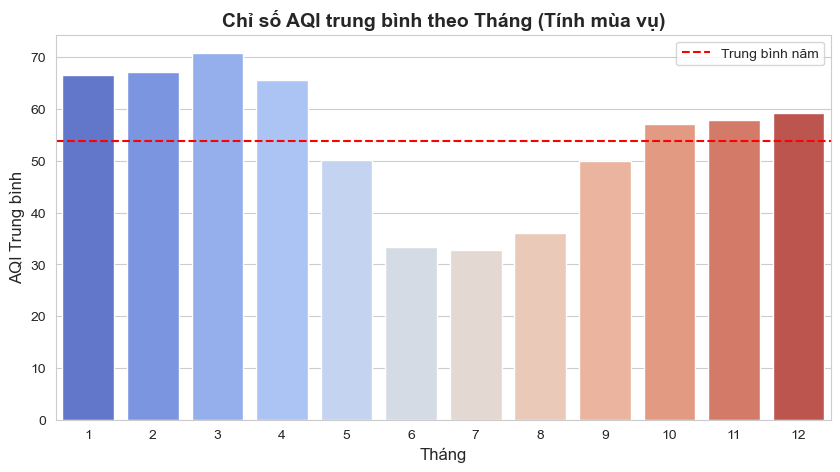

In [15]:
# Tính trung bình AQI theo tháng (gộp tất cả các năm lại)
monthly_trend = df.groupby('month')['aqi'].mean().reset_index()

# Trực quan hóa
plt.figure(figsize=(10, 5))
sns.barplot(data=monthly_trend, x='month', y='aqi', palette='coolwarm')

# Trang trí
plt.title('Chỉ số AQI trung bình theo Tháng (Tính mùa vụ)', fontsize=14, fontweight='bold')
plt.xlabel('Tháng', fontsize=12)
plt.ylabel('AQI Trung bình', fontsize=12)
plt.axhline(y=monthly_trend['aqi'].mean(), color='red', linestyle='--', label='Trung bình năm')
plt.legend()

plt.show()

### Nhận xét về Tính Mùa vụ (Seasonal Pattern)

Biểu đồ cột thể hiện chỉ số AQI trung bình theo tháng cho thấy một **chu kỳ biến động theo mùa** rất rõ rệt (hình dáng chữ U):

**1. Mùa ô nhiễm (Tháng 10 đến Tháng 4 năm sau)**
*   Chất lượng không khí thường xuyên ở mức kém trong các tháng mùa Đông và mùa Xuân.
*   Cụ thể, các tháng **1, 2, 3, 4** và **10, 11, 12** đều có chỉ số AQI **vượt qua đường trung bình năm** (đường kẻ đỏ nét đứt, mức ~54).
*   **Đỉnh điểm:** Ô nhiễm nặng nhất rơi vào **Tháng 3**, với chỉ số AQI trung bình vượt mức 70.

**2. Mùa không khí sạch (Tháng 6 đến Tháng 8)**
*   Mùa Hè là thời điểm chất lượng không khí tốt nhất trong năm.
*   Các tháng **6, 7, 8** có chỉ số AQI giảm sâu, thấp hơn rất nhiều so với mức trung bình năm (chỉ dao động quanh mức 30 - 35).
*   **Thấp nhất:** **Tháng 7** là tháng có không khí trong lành nhất.

**3. Giai đoạn chuyển tiếp**
*   **Tháng 5:** Là tháng bản lề khi chất lượng không khí bắt đầu cải thiện rõ rệt và tụt xuống dưới mức trung bình năm.
*   **Tháng 9:** Là thời điểm chất lượng không khí bắt đầu suy giảm trở lại sau mùa hè, chuẩn bị bước vào chu kỳ ô nhiễm cuối năm.

**Giải thích sơ bộ:**
Sự chênh lệch lớn giữa mùa Đông và mùa Hè có thể do các yếu tố khí tượng. Mùa Hè thường có mưa nhiều và gió mạnh giúp rửa trôi và khuếch tán bụi. Ngược lại, mùa Đông ít mưa và hiện tượng nghịch nhiệt (inversion) có thể khiến các chất ô nhiễm bị giữ lại gần mặt đất, làm tăng chỉ số AQI.

##  Heatmap tổng hợp (The Big Picture)

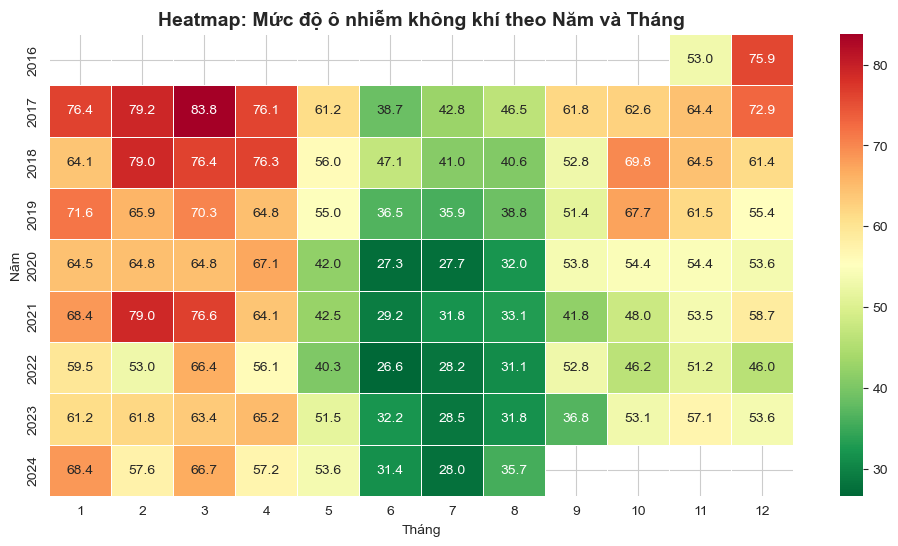

In [16]:
# Tạo bảng Pivot: Hàng = Năm, Cột = Tháng, Giá trị = AQI trung bình
pivot_table = df.pivot_table(values='aqi', index='year', columns='month', aggfunc='mean')

# Vẽ Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='RdYlGn_r', annot=True, fmt=".1f", linewidths=.5)
# cmap='RdYlGn_r': Đỏ (cao/xấu) -> Vàng -> Xanh (thấp/tốt)

plt.title('Heatmap: Mức độ ô nhiễm không khí theo Năm và Tháng', fontsize=14, fontweight='bold')
plt.xlabel('Tháng')
plt.ylabel('Năm')
plt.show()

### Nhận xét Tổng quan (Heatmap Analysis)

Biểu đồ Heatmap kết hợp hai chiều thời gian (Năm và Tháng) mang lại cái nhìn toàn cảnh về diễn biến chất lượng không khí:

**1. Vùng "Nóng" (Hotspots - Màu đỏ/cam)**
*   Các ô màu đỏ đậm tập trung chủ yếu vào **quý 1 (tháng 1, 2, 3)** của các năm từ **2017 đến 2019**. Đây là giai đoạn ô nhiễm đỉnh điểm trong lịch sử quan trắc của bộ dữ liệu.
*   Đặc biệt, **năm 2017** có màu đỏ rực rỡ kéo dài gần như suốt nửa đầu năm và cả những tháng cuối năm, cho thấy đây là năm có chất lượng không khí tệ nhất.

**2. Vùng "Xanh" (Green zones - Màu xanh lá)**
*   Màu xanh lá cây (biểu thị không khí tốt) xuất hiện tập trung vào các tháng mùa Hè (**tháng 6, 7, 8**) xuyên suốt qua tất cả các năm. Điều này khẳng định tính ổn định của mô hình mùa vụ: mùa Hè luôn là thời điểm sạch nhất.
*   Đáng chú ý, vùng màu xanh có xu hướng **mở rộng hơn** trong các năm **2020, 2021, 2022**, lan sang cả tháng 5 và tháng 9. Điều này cho thấy sự cải thiện chất lượng không khí không chỉ ở mức độ (chỉ số giảm) mà còn ở thời lượng (số tháng sạch tăng lên).

**3. Sự "Hồi phục" của ô nhiễm (2023 - 2024)**
*   Nhìn vào các hàng cuối cùng (năm 2023, 2024), màu sắc đang chuyển dần từ xanh/vàng nhạt sang cam/vàng đậm hơn so với giai đoạn 2020-2022.
*   Đặc biệt, các tháng đầu năm 2024 (tháng 1, 2, 3) đã quay lại mức màu cam (AQI ~60-70), cao hơn so với cùng kỳ năm 2022. Đây là dấu hiệu cảnh báo xu hướng cải thiện đang chững lại hoặc đảo chiều.

**Kết luận:** Heatmap xác nhận rõ ràng tính quy luật theo mùa và xu hướng cải thiện dài hạn, nhưng cũng gióng lên hồi chuông cảnh báo về sự gia tăng ô nhiễm trở lại trong thời gian gần đây.

## So sánh chu kỳ ô nhiễm giữa các năm (Cyclical Analysis)

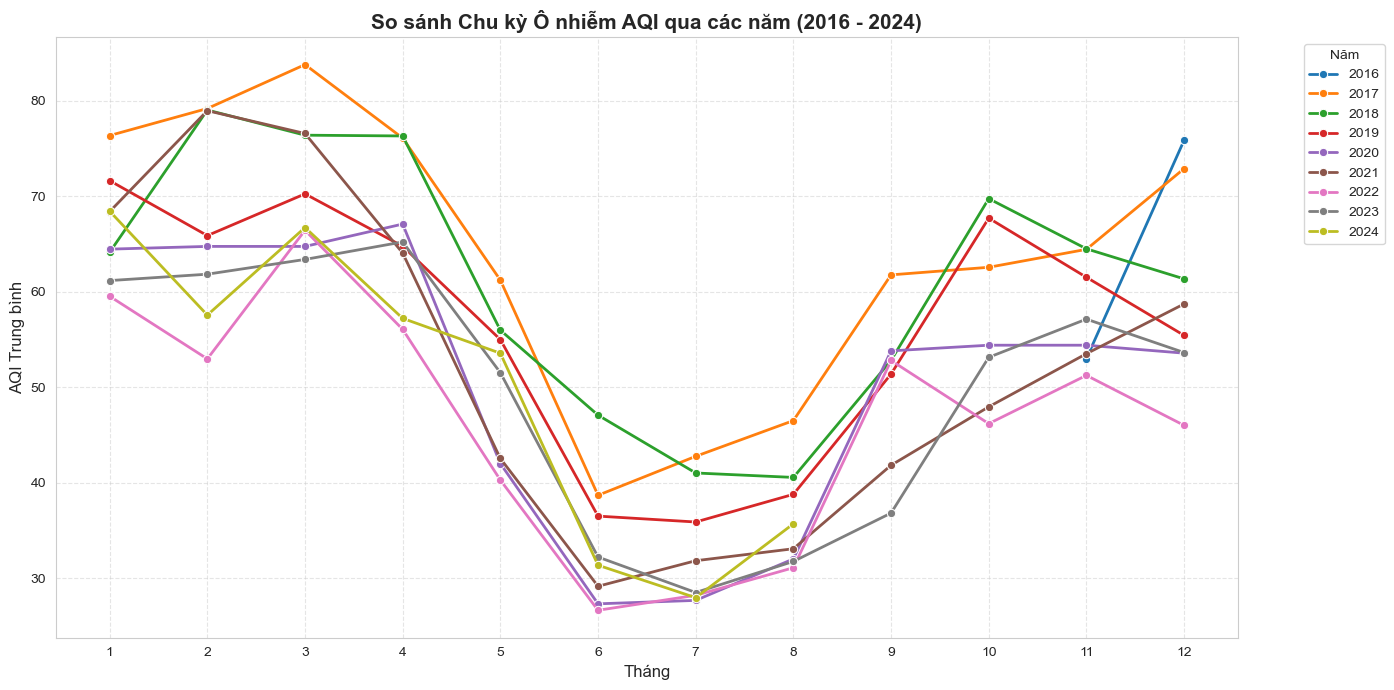

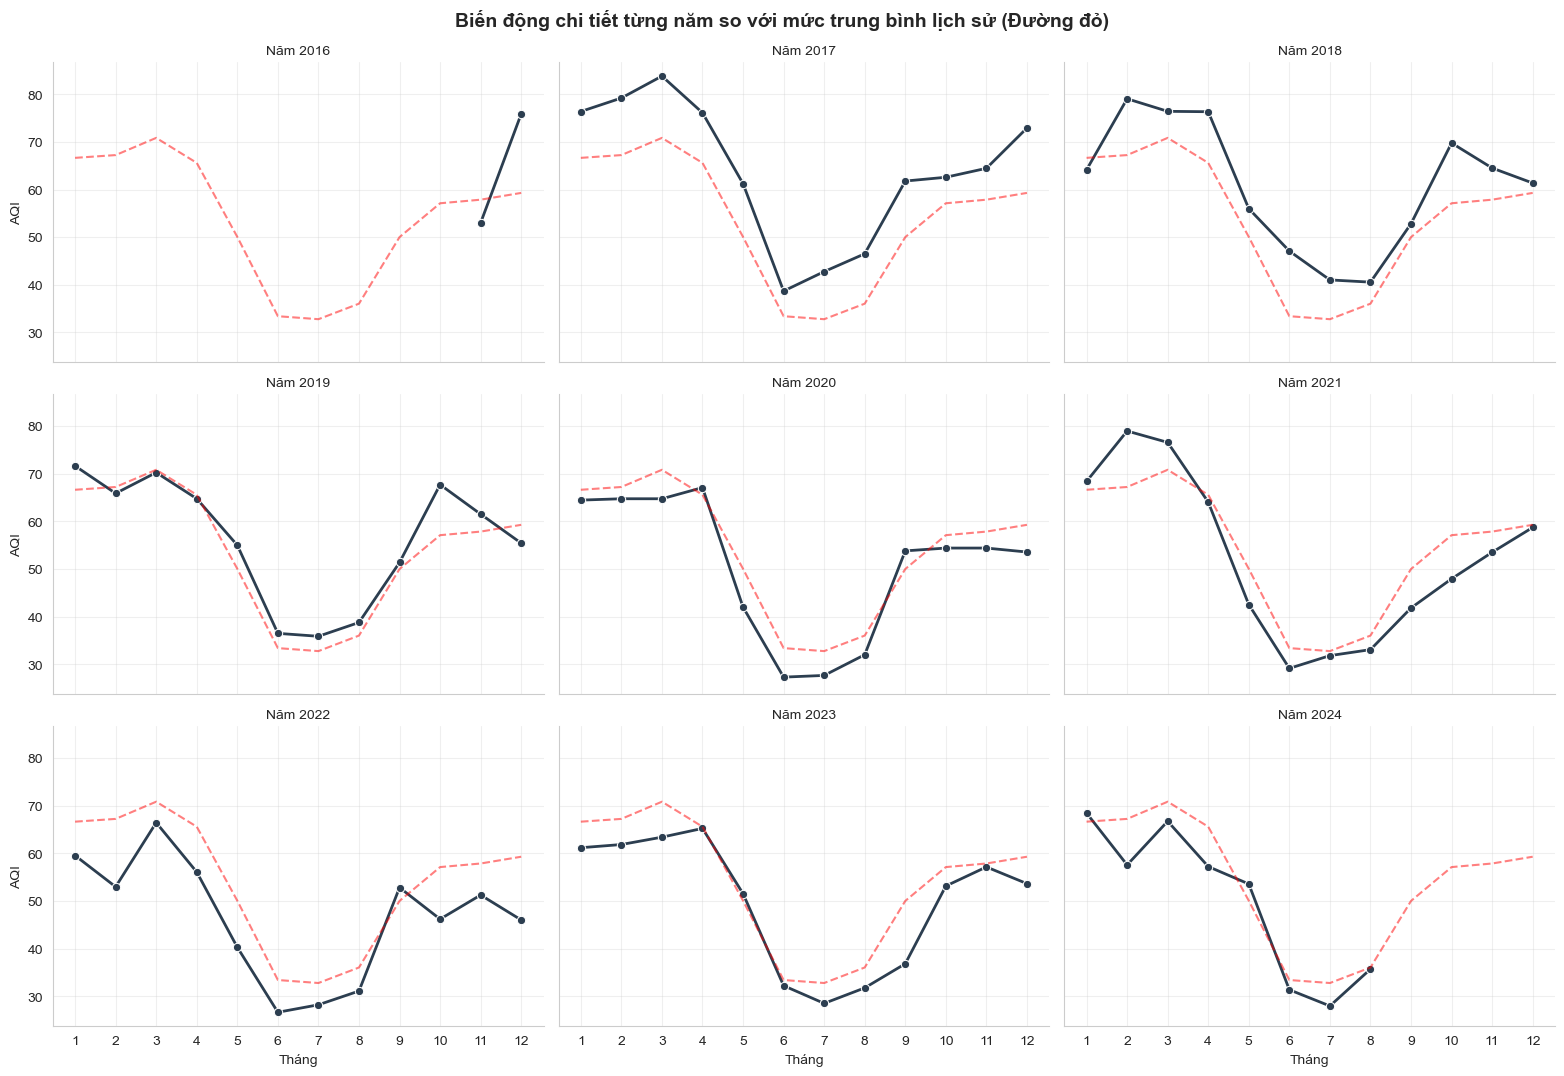

In [17]:
# 1. Chuẩn bị dữ liệu: Gom nhóm theo Năm và Tháng
monthly_pattern = df.groupby(['year', 'month'])['aqi'].mean().reset_index()

# Lọc bỏ năm 2016 nếu dữ liệu quá ít (ví dụ chỉ có tháng 11, 12) để tránh biểu đồ bị gãy
# Tuy nhiên, code dưới đây vẫn vẽ để bạn kiểm tra, nếu xấu có thể filter:
# monthly_pattern = monthly_pattern[monthly_pattern['year'] > 2016]

# --- BIỂU ĐỒ 1: SO SÁNH TRỰC TIẾP (OVERLAY) ---
plt.figure(figsize=(14, 7))

# Vẽ biểu đồ đường phân biệt màu theo năm
sns.lineplot(
    data=monthly_pattern, 
    x='month', 
    y='aqi', 
    hue='year', 
    palette='tab10',  # Bảng màu đa dạng để phân biệt các năm
    marker='o',
    linewidth=2
)

plt.title('So sánh Chu kỳ Ô nhiễm AQI qua các năm (2016 - 2024)', fontsize=15, fontweight='bold')
plt.xlabel('Tháng', fontsize=12)
plt.ylabel('AQI Trung bình', fontsize=12)
plt.xticks(range(1, 13)) # Hiển thị đủ 12 tháng
plt.legend(title='Năm', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --- BIỂU ĐỒ 2: TÁCH BIỆT TỪNG NĂM (FACET GRID) ---
# Thêm đường trung bình chung của tất cả các năm để làm mốc so sánh
overall_monthly_avg = df.groupby('month')['aqi'].mean()

g = sns.FacetGrid(monthly_pattern, col="year", col_wrap=3, height=3.5, aspect=1.5, sharey=True)
g.map(sns.lineplot, "month", "aqi", marker="o", color="#2c3e50", linewidth=2)

# Vẽ thêm đường tham chiếu (màu đỏ mờ) là trung bình chung của toàn bộ lịch sử
for ax in g.axes.flat:
    ax.plot(overall_monthly_avg.index, overall_monthly_avg.values, color='red', linestyle='--', alpha=0.5, label='TB Lịch sử')
    ax.set_xticks(range(1, 13))
    ax.grid(True, alpha=0.3)

g.set_titles("Năm {col_name}")
g.set_axis_labels("Tháng", "AQI")
plt.suptitle('Biến động chi tiết từng năm so với mức trung bình lịch sử (Đường đỏ)', y=1.02, fontsize=14, fontweight='bold')
plt.show()

### Nhận xét về Tính ổn định của Chu kỳ (Cyclical Stability)

Thông qua biểu đồ so sánh chu kỳ ô nhiễm của từng năm so với mức trung bình lịch sử, chúng ta có những phát hiện quan trọng sau:

**1. Tính Quy luật bền vững (Consistency):**
*   **Mô hình "Chữ V/U" lặp lại:** Hầu hết các năm đều tuân thủ chặt chẽ một mô hình chung: AQI cao vào đầu năm (tháng 1-3), giảm sâu xuống đáy vào giữa năm (tháng 6-7), và tăng trở lại vào cuối năm (tháng 10-12).
*   **Sự đồng pha:** Các đường biểu đồ của từng năm di chuyển khá song song với đường trung bình lịch sử (nét đứt đỏ), đặc biệt là giai đoạn giảm mạnh từ tháng 4 đến tháng 7. Điều này khẳng định tính mùa vụ của ô nhiễm không khí tại đây là một đặc tính cố hữu, chịu sự chi phối mạnh mẽ của khí hậu tự nhiên.

**2. Sự thay đổi về Biên độ (Amplitude Changes):**
*   **Giai đoạn trước 2019 (Biên độ lớn):** Các năm 2017, 2018 có biên độ dao động rất mạnh. Đỉnh ô nhiễm đầu năm thường vượt xa mức trung bình (AQI > 80), cho thấy tình trạng ô nhiễm mùa đông rất nghiêm trọng trong quá khứ.
*   **Giai đoạn 2020 - 2022 (Biên độ thu hẹp - Cải thiện):**
    *   Các năm này cho thấy sự cải thiện rõ rệt khi đường biểu đồ nằm **thấp hơn** hoặc bám sát đường trung bình lịch sử.
    *   Đặc biệt năm **2022**, đường biểu đồ nằm hoàn toàn bên dưới đường trung bình đỏ trong hầu hết các tháng, xác nhận đây là năm có chất lượng không khí tốt nhất. Đáy của năm 2022 xuống rất thấp (AQI < 30 vào tháng 6-7).
*   **Giai đoạn 2023 - 2024 (Dấu hiệu quay lại):**
    *   Năm 2023 bắt đầu bám sát trở lại đường trung bình đỏ.
    *   Đáng chú ý, **năm 2024** (biểu đồ cuối cùng) cho thấy xu hướng đầu năm (tháng 1-4) đang thấp hơn trung bình, nhưng vẫn duy trì mô hình chữ V quen thuộc.

**3. Các điểm dị biệt (Anomalies):**
*   **Năm 2021:** Tháng 3-4 có sự tăng vọt bất thường, tạo thành một đỉnh phụ cao hơn hẳn so với xu hướng giảm thông thường của giai đoạn này.
*   **Năm 2016 (Dữ liệu không đầy đủ):** Chỉ có dữ liệu các tháng cuối năm, do đó không thể hiện được trọn vẹn chu kỳ.

**Kết luận:** Quy luật biến động theo mùa của chất lượng không khí là rất ổn định qua 9 năm. Tuy nhiên, cường độ ô nhiễm (độ cao của các đỉnh) đã giảm dần theo thời gian, chứng tỏ hiệu quả của các biện pháp kiểm soát dài hạn, mặc dù vẫn cần cảnh giác với xu hướng chững lại trong 2 năm gần đây.

---
## KẾT LUẬN & TRẢ LỜI CÂU HỎI

Dựa trên quá trình phân tích dữ liệu lịch sử từ 2016 đến 2024, chúng tôi đã có đủ bằng chứng để trả lời cho câu hỏi nghiên cứu: **"Chất lượng không khí tại Đài Loan thay đổi như thế nào và có tuân theo quy luật không?"**

**1. Về Xu hướng dài hạn (Long-term Trend): Cải thiện nhưng đang chững lại**
*   **Kết quả:** Chất lượng không khí tại Đài Loan đã có sự **cải thiện rõ rệt** trong 9 năm qua. Chỉ số AQI trung bình năm giảm từ đỉnh **72.8 (năm 2016)** xuống mức thấp kỷ lục **46.4 (năm 2022)**, tương ứng với mức giảm khoảng **36%**.
*   **Cảnh báo:** Tuy nhiên, xu hướng giảm này đã **chững lại** và có dấu hiệu **"bão hòa"** hoặc tăng nhẹ trong giai đoạn **2023 - 2024** (dao động quanh mức 49.8). Điều này cho thấy các biện pháp kiểm soát ô nhiễm hiện tại có thể đã đạt đến giới hạn hiệu quả và cần những chiến lược mới mạnh mẽ hơn.

**2. Về Tính Mùa vụ (Seasonality): Quy luật "Chữ U" bền vững**
*   **Kết quả:** Dữ liệu khẳng định sự tồn tại của một quy luật mùa vụ **rất mạnh và ổn định** qua tất cả các năm.
    *   **Mùa ô nhiễm:** Tập trung vào **Quý 1 (Tháng 1-3)** và **Quý 4 (Tháng 10-12)**. Tháng 3 thường là đỉnh điểm của ô nhiễm.
    *   **Mùa sạch:** Mùa hè (**Tháng 6, 7, 8**) luôn là thời điểm không khí trong lành nhất với chỉ số AQI thường xuyên dưới mức 35.
*   **Ổn định:** Biểu đồ so sánh chu kỳ qua các năm cho thấy hình dáng đường biểu đồ (pattern) gần như không thay đổi, chỉ có biên độ (độ cao thấp) là giảm dần theo thời gian.

**3. Ý nghĩa thực tiễn & Khuyến nghị:**
*   **Người dân:** Cần đặc biệt chú ý bảo vệ sức khỏe, đeo khẩu trang và hạn chế hoạt động mạnh ngoài trời vào các tháng **1, 2, 3** hàng năm. Mùa hè là thời điểm lý tưởng cho các hoạt động du lịch và thể thao ngoài trời.
*   **Chính sách:** Các cơ quan quản lý môi trường cần tập trung nguồn lực kiểm soát khí thải vào mùa Đông và mùa Xuân (khi điều kiện khí tượng không thuận lợi để khuếch tán bụi). Cần điều tra nguyên nhân khiến AQI tăng trở lại vào đầu năm 2024 để có biện pháp can thiệp kịp thời.

---